In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data=pd.read_csv("C:/Users/Dell/Desktop/derinOgrenme/diabetes.csv")

In [17]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
sekerHastasi=data[data.Outcome==1]
saglikli=data[data.Outcome==0]


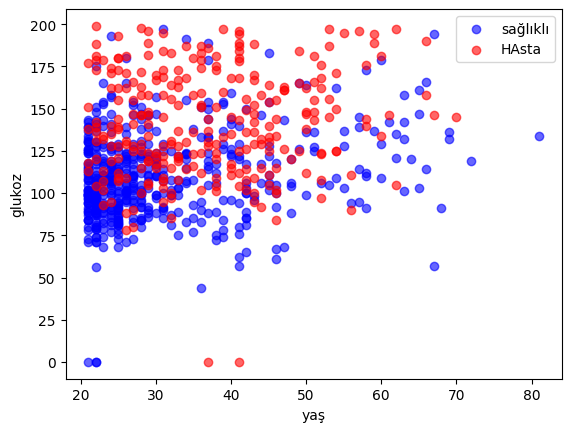

In [26]:
plt.scatter(saglikli.Age,saglikli.Glucose,color="blue",label="sağlıklı",alpha=0.6)
plt.scatter(sekerHastasi.Age,sekerHastasi.Glucose,color="red",label="HAsta",alpha=0.6)
plt.xlabel("yaş")
plt.ylabel("glukoz")
plt.legend()
plt.show()

In [27]:
x1=data.iloc[:,0:-1]
y1=data.iloc[:,-1].values

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.28,random_state=45)

In [36]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()

In [37]:
xtrain1=sc.fit_transform(xtrain)
xtest1=sc.transform(xtest)
# knn algoritmasi için standardizasyon yaptık çünkü daha iyi performans vermesini sağlar
# standardizasyon; Özelliklerin Eşit Ağırlıkta Olmasını Sağlar: 

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(23)
knn.fit(xtrain1,ytrain) 
# burada model oluşturduk fit ilede eğittik verileri

KNeighborsClassifier(n_neighbors=23)

In [74]:
yhead=knn.predict(xtest1)
#Bu satır, KNeighborsClassifier modelini kullanarak test setindeki örneklerin sınıflarını tahmin eder. 
#Tahmin edilen sınıflar yhead değişkeninde saklanır.

In [75]:
knn.score(xtest1,ytest)

0.7546296296296297

In [47]:
scorelite=[]
for i in range(1,30):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(xtrain1,ytrain)
    scorelite.append(knn2.score(xtest1,ytest))
# burada en iyi performans veren komşu sayısını belirlledik for döngüsüyle

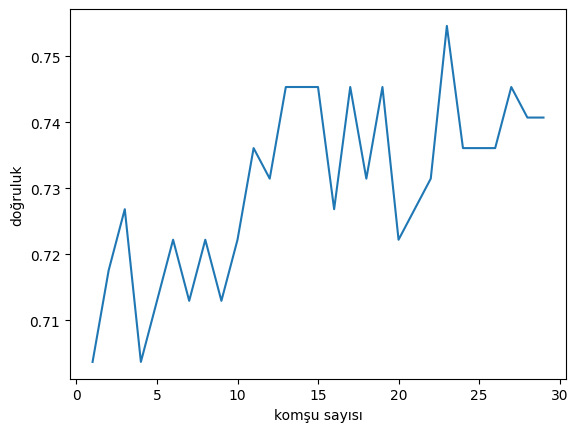

In [48]:
plt.plot(range(1,30),scorelite)
plt.xlabel("komşu sayısı")
plt.ylabel("doğruluk")
plt.show()